In [1]:
import pandas as pd
prts = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
prts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [2]:
# two unique ids ?
len(prts['pid'].unique())

1050

In [3]:
# an exemple of product line :
prts.loc[4]

uniq_id                                     6325b6870c54cd47be6ebfbffa620ec7
crawl_timestamp                                    2016-06-20 08:49:52 +0000
product_url                http://www.flipkart.com/jaipur-print-cotton-fl...
product_name               Jaipur Print Cotton Floral King sized Double B...
product_category_tree      ["Home Furnishing >> Bed Linen >> Bedsheets >>...
pid                                                         BDSEJTHNGWVGWWQU
retail_price                                                          2599.0
discounted_price                                                       698.0
image                                   6325b6870c54cd47be6ebfbffa620ec7.jpg
is_FK_Advantage_product                                                False
description                Key Features of Jaipur Print Cotton Floral Kin...
product_rating                                           No rating available
overall_rating                                           No rating available

In [4]:
# the complete line :
for i in range(15):
    print(prts.columns[i] + ': ' + str(prts.loc[4][i]))

uniq_id: 6325b6870c54cd47be6ebfbffa620ec7
crawl_timestamp: 2016-06-20 08:49:52 +0000
product_url: http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v?pid=BDSEJTHNGWVGWWQU
product_name: Jaipur Print Cotton Floral King sized Double Bedsheet
product_category_tree: ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]
pid: BDSEJTHNGWVGWWQU
retail_price: 2599.0
discounted_price: 698.0
image: 6325b6870c54cd47be6ebfbffa620ec7.jpg
is_FK_Advantage_product: False
description: Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comfort. This bed sheet is hand printed. This bedsheet gives nice look to your room And its fast colour and good quality gives this bedsheet long life.,Specifications of

In [2]:
import nltk

tokenizer = nltk.RegexpTokenizer(r'\w+') # r'\w+' est une 'regular expression'
'''r indique que la chaîne est une chaîne 'brute'. Dans une chaîne brute,
   il n’est pas nécessaire d’écrire des doubles slashes lorsque qu'on utilise
   des séquences d’échappement; par exemple, si vous voulez un backslash,
   alors vous avez juste un simple \ mais pas de doubles backslashes \\ comme
   dans les chaînes normales. C’est la seule différence entre une chaîne
   régulière et une chaîne brute.
   \w indique qu'on traite les mots = chaines alphabétiques séparées par des
   espaces et ponctuations
   Enfin le + indique qu'il y aura (probablement) plusieurs mots'''
# Avantage de nltk.RegexpTokenizer(r'\w+') / nltk.word_tokenize() : évite
# le traitement des ponctuations et autres caractères non-alphabétiques.
# Quoiqu'on peut aussi le faire avec stop_w.extend(set(string.punctuation))
# si stop_w vaut initialement 'stopwords.words('english')' et qu'on ajoute
# le traitement adéquat, mais c'est plus laborieux.

prodesc = dict()   # will contain the uniq_id and for each the description

for i in range(len(prts)):
    prodesc[prts.loc[i][0]] = tokenizer.tokenize(prts.loc[i][10])
    
prodesc['6325b6870c54cd47be6ebfbffa620ec7']

['Key',
 'Features',
 'of',
 'Jaipur',
 'Print',
 'Cotton',
 'Floral',
 'King',
 'sized',
 'Double',
 'Bedsheet',
 '100',
 'cotton',
 'Jaipur',
 'Print',
 'Cotton',
 'Floral',
 'King',
 'sized',
 'Double',
 'Bedsheet',
 '1',
 'bed',
 'sheet',
 '2',
 'pillow',
 'cover',
 'White',
 'Price',
 'Rs',
 '998',
 'This',
 'nice',
 'bed',
 'sheet',
 'made',
 'up',
 'of',
 '100',
 'cotton',
 'to',
 'give',
 'you',
 'comfort',
 'This',
 'bed',
 'sheet',
 'is',
 'hand',
 'printed',
 'This',
 'bedsheet',
 'gives',
 'nice',
 'look',
 'to',
 'your',
 'room',
 'And',
 'its',
 'fast',
 'colour',
 'and',
 'good',
 'quality',
 'gives',
 'this',
 'bedsheet',
 'long',
 'life',
 'Specifications',
 'of',
 'Jaipur',
 'Print',
 'Cotton',
 'Floral',
 'King',
 'sized',
 'Double',
 'Bedsheet',
 '1',
 'bed',
 'sheet',
 '2',
 'pillow',
 'cover',
 'White',
 'General',
 'Machine',
 'Washable',
 'Yes',
 'Brand',
 'Jaipur',
 'Print',
 'Type',
 'Flat',
 'Model',
 'Name',
 'jaipur117',
 'Material',
 'Cotton',
 'Thread',
 

In [3]:
# We remove the 'stopwords' :
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

for i in prodesc.values() :
    for j in range(len(i)) :
        low = i[j].lower()  # by the way, get the dict. in lowercase
        if low in stop_words :
            i[j] = ''
        else :
            i[j] = low

prodesc['6325b6870c54cd47be6ebfbffa620ec7']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jlper\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['key',
 'features',
 '',
 'jaipur',
 'print',
 'cotton',
 'floral',
 'king',
 'sized',
 'double',
 'bedsheet',
 '100',
 'cotton',
 'jaipur',
 'print',
 'cotton',
 'floral',
 'king',
 'sized',
 'double',
 'bedsheet',
 '1',
 'bed',
 'sheet',
 '2',
 'pillow',
 'cover',
 'white',
 'price',
 'rs',
 '998',
 '',
 'nice',
 'bed',
 'sheet',
 'made',
 '',
 '',
 '100',
 'cotton',
 '',
 'give',
 '',
 'comfort',
 '',
 'bed',
 'sheet',
 '',
 'hand',
 'printed',
 '',
 'bedsheet',
 'gives',
 'nice',
 'look',
 '',
 '',
 'room',
 '',
 '',
 'fast',
 'colour',
 '',
 'good',
 'quality',
 'gives',
 '',
 'bedsheet',
 'long',
 'life',
 'specifications',
 '',
 'jaipur',
 'print',
 'cotton',
 'floral',
 'king',
 'sized',
 'double',
 'bedsheet',
 '1',
 'bed',
 'sheet',
 '2',
 'pillow',
 'cover',
 'white',
 'general',
 'machine',
 'washable',
 'yes',
 'brand',
 'jaipur',
 'print',
 'type',
 'flat',
 'model',
 'name',
 'jaipur117',
 'material',
 'cotton',
 'thread',
 'count',
 '140',
 'model',
 'id',
 'jaipur117'

In [5]:
# we remove the empty strings which were stopwords
for i, j in prodesc.items() :
    prodesc[i] = list(filter(None, j))

prodesc['6325b6870c54cd47be6ebfbffa620ec7']

['key',
 'features',
 'jaipur',
 'print',
 'cotton',
 'floral',
 'king',
 'sized',
 'double',
 'bedsheet',
 '100',
 'cotton',
 'jaipur',
 'print',
 'cotton',
 'floral',
 'king',
 'sized',
 'double',
 'bedsheet',
 '1',
 'bed',
 'sheet',
 '2',
 'pillow',
 'cover',
 'white',
 'price',
 'rs',
 '998',
 'nice',
 'bed',
 'sheet',
 'made',
 '100',
 'cotton',
 'give',
 'comfort',
 'bed',
 'sheet',
 'hand',
 'printed',
 'bedsheet',
 'gives',
 'nice',
 'look',
 'room',
 'fast',
 'colour',
 'good',
 'quality',
 'gives',
 'bedsheet',
 'long',
 'life',
 'specifications',
 'jaipur',
 'print',
 'cotton',
 'floral',
 'king',
 'sized',
 'double',
 'bedsheet',
 '1',
 'bed',
 'sheet',
 '2',
 'pillow',
 'cover',
 'white',
 'general',
 'machine',
 'washable',
 'yes',
 'brand',
 'jaipur',
 'print',
 'type',
 'flat',
 'model',
 'name',
 'jaipur117',
 'material',
 'cotton',
 'thread',
 'count',
 '140',
 'model',
 'id',
 'jaipur117',
 'fabric',
 'care',
 'machinewash',
 'bleach',
 'size',
 'king',
 'color',
 'w

In [6]:
#It seems we still have a lot of low signification words, let's try to identify
# and remove them, in order to increase the relevence of those we will keep
#----------------------------------------------------------------------------79
vocab = dict()

for i in prodesc.values() :
    for j in range(len(i)) :
        if vocab.get(i[j]) :
            vocab[i[j]] += 1
        else :
            vocab[i[j]] = 1

len(vocab)

5966

In [7]:
vocab['price']

352

In [8]:
for k in vocab:    
    if vocab[k] > 199 :
        print(k, end=', ')


key, features, cm, pack, 2, price, rs, quality, fabric, specifications, general, brand, type, model, set, color, box, number, sales, package, design, material, cotton, 3, 30, products, product, 1, warranty, analog, watch, buy, online, flipkart, com, genuine, day, replacement, guarantee, free, shipping, cash, delivery, best, prices, 5, ceramic, baby, details, mug, showpiece, laptop, 

In [9]:
# we will remove most of these words; And may be a bit more ?
for k in vocab:    
    if (vocab[k] > 99) & (vocab[k] < 200) :
        print(k, end=', ')


multicolor, height, made, high, style, home, light, designed, name, dimensions, length, contents, blue, yes, ideal, men, women, size, inch, width, care, skin, wash, water, use, x, weight, printed, cover, print, india, great, discounts, black, round, one, pattern, ml, combo, 4, l, power, 6, girl, coffee, mugs, gift, usb, also, perfect, easy, dress, battery, adapter, 

In [10]:
# here is the list we will remove from prodesc :
maListe = """key, features, cm, pack, price, rs, quality, fabric, specifications, general, brand, type, model, set, color, box, 
number, sales, package, design, material, products, product, warranty, analog, watch, buy, online, flipkart, com, genuine, day, 
replacement, guarantee, free, shipping, cash, delivery, best, prices, details, showpiece, multicolor, height, made, high, 
style, designed, name, dimensions, length, contents, blue, yes, ideal, size, inch, width, care, wash, use, x, weight, print, 
india, great, discounts, one, pattern, also, perfect, easy"""

add_stop_wds = maListe.split(', ')
add_stop_wds[:10]

['key',
 'features',
 'cm',
 'pack',
 'price',
 'rs',
 'quality',
 'fabric',
 'specifications',
 'general']

In [11]:
for i in prodesc.values() :
    for j in range(len(i)) :
        if i[j] in add_stop_wds :
            i[j] = ''

for i, j in prodesc.items() :
    prodesc[i] = list(filter(None, j))

prodesc['6325b6870c54cd47be6ebfbffa620ec7']

['jaipur',
 'cotton',
 'floral',
 'king',
 'sized',
 'double',
 'bedsheet',
 '100',
 'cotton',
 'jaipur',
 'cotton',
 'floral',
 'king',
 'sized',
 'double',
 'bedsheet',
 '1',
 'bed',
 'sheet',
 '2',
 'pillow',
 'cover',
 'white',
 '998',
 'nice',
 'bed',
 'sheet',
 '100',
 'cotton',
 'give',
 'comfort',
 'bed',
 'sheet',
 'hand',
 'printed',
 'bedsheet',
 'gives',
 'nice',
 'look',
 'room',
 'fast',
 'colour',
 'good',
 'gives',
 'bedsheet',
 'long',
 'life',
 'jaipur',
 'cotton',
 'floral',
 'king',
 'sized',
 'double',
 'bedsheet',
 '1',
 'bed',
 'sheet',
 '2',
 'pillow',
 'cover',
 'white',
 'machine',
 'washable',
 'jaipur',
 'flat',
 'jaipur117',
 'cotton',
 'thread',
 'count',
 '140',
 'id',
 'jaipur117',
 'machinewash',
 'bleach',
 'king',
 'white',
 'waranty',
 'manufacturing',
 'defect',
 'exchange',
 'onle',
 'used',
 'returne',
 'origional',
 'packing',
 'flat',
 'sheet',
 '86',
 '220',
 'fitted',
 'sheet',
 '0',
 'pillow',
 'cover',
 '17',
 '45',
 'pillow',
 'cover',
 '29

In [12]:
# Really better, but still some words that could be removes,
# as 'sized', 'nice'. Also, the figures aren't usefull out of the context.
for k in vocab:    
    if (vocab[k] > 49) & (vocab[k] < 100) :
        print(k, end=', ')


polyester, abstract, floral, look, 100, room, elegant, give, bring, get, id, body, bath, towel, red, yellow, boys, girls, 9, soft, 10, may, g, double, bedsheet, gold, sheet, depth, bed, white, comfort, hand, long, 0, like, digital, resistant, glass, dial, making, well, art, led, fresh, shape, dark, stainless, steel, back, case, strap, 12, please, casual, 8, code, 15, additional, tea, inches, 7, capacity, dishwasher, mm, microwave, safe, table, suitable, green, neck, hair, loved, ones, make, covered, kitchen, bottle, stylish, pink, occasion, beautiful, single, boy, brown, fit, sleeve, wall, sticker, brass, pad, rockmantra, yet, exclusive, come, pick, pizza, shirt, 19, charger, vaio, vgn, shapes, 

In [13]:
maListe = '''sized, nice, look, give, gives, bring, get, id, like, well,\
making, please, loved, ones, make, stylish, yet, exclusive, come'''
add_stop_wds = maListe.split(', ')
for i in prodesc.values() :
    for j in range(len(i)) :
        if i[j] in add_stop_wds :
            i[j] = ''
        elif i[j].isdigit() :   # also exists : s.isnumeric()
            i[j] = ''

for i, j in prodesc.items() :
    prodesc[i] = list(filter(None, j))
    
prodesc['6325b6870c54cd47be6ebfbffa620ec7']

['jaipur',
 'cotton',
 'floral',
 'king',
 'double',
 'bedsheet',
 'cotton',
 'jaipur',
 'cotton',
 'floral',
 'king',
 'double',
 'bedsheet',
 'bed',
 'sheet',
 'pillow',
 'cover',
 'white',
 'bed',
 'sheet',
 'cotton',
 'comfort',
 'bed',
 'sheet',
 'hand',
 'printed',
 'bedsheet',
 'room',
 'fast',
 'colour',
 'good',
 'bedsheet',
 'long',
 'life',
 'jaipur',
 'cotton',
 'floral',
 'king',
 'double',
 'bedsheet',
 'bed',
 'sheet',
 'pillow',
 'cover',
 'white',
 'machine',
 'washable',
 'jaipur',
 'flat',
 'jaipur117',
 'cotton',
 'thread',
 'count',
 'jaipur117',
 'machinewash',
 'bleach',
 'king',
 'white',
 'waranty',
 'manufacturing',
 'defect',
 'exchange',
 'onle',
 'used',
 'returne',
 'origional',
 'packing',
 'flat',
 'sheet',
 'fitted',
 'sheet',
 'pillow',
 'cover',
 'pillow',
 'cover',
 'g',
 'fitted',
 'sheet',
 'depth',
 'fitted',
 'sheet',
 'flat',
 'sheet',
 'depth',
 'flat',
 'sheet',
 'number',
 'bed',
 'sheet',
 'pillow',
 'cover']

In [17]:
# Now let's apply a lemmatization process with nltk :
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Par défaut, le lemmatizer de NLTK n'agit que sur les noms, mais on peut
# lui spécifier d’autres PoS (Part-of-Speech) comme le verbe ou l’adjectif,
# et l’employer dans une composition de fonctions comme suit :

lemmatizer = WordNetLemmatizer()

for i in prodesc.values() :
    for j in range(len(i)) :
        i[j] = lemmatizer.lemmatize(lemmatizer.
                                    lemmatize(lemmatizer.
                                              lemmatize(i[j], pos='a'),
                                              pos='v'), pos='n')

prodesc['6325b6870c54cd47be6ebfbffa620ec7']

['jaipur',
 'cotton',
 'floral',
 'king',
 'double',
 'bedsheet',
 'cotton',
 'jaipur',
 'cotton',
 'floral',
 'king',
 'double',
 'bedsheet',
 'bed',
 'sheet',
 'pillow',
 'cover',
 'white',
 'bed',
 'sheet',
 'cotton',
 'comfort',
 'bed',
 'sheet',
 'hand',
 'print',
 'bedsheet',
 'room',
 'fast',
 'colour',
 'good',
 'bedsheet',
 'long',
 'life',
 'jaipur',
 'cotton',
 'floral',
 'king',
 'double',
 'bedsheet',
 'bed',
 'sheet',
 'pillow',
 'cover',
 'white',
 'machine',
 'washable',
 'jaipur',
 'flat',
 'jaipur117',
 'cotton',
 'thread',
 'count',
 'jaipur117',
 'machinewash',
 'bleach',
 'king',
 'white',
 'waranty',
 'manufacture',
 'defect',
 'exchange',
 'onle',
 'use',
 'returne',
 'origional',
 'pack',
 'flat',
 'sheet',
 'fit',
 'sheet',
 'pillow',
 'cover',
 'pillow',
 'cover',
 'g',
 'fit',
 'sheet',
 'depth',
 'fit',
 'sheet',
 'flat',
 'sheet',
 'depth',
 'flat',
 'sheet',
 'number',
 'bed',
 'sheet',
 'pillow',
 'cover']

In [18]:
# saving work :
import pickle
with open('prodesc.pickle', 'wb') as f:
    pickle.dump(prodesc, f, pickle.HIGHEST_PROTOCOL)
f.close()  # with 'wb' arg. the file is built from 0 at new dump

In [1]:
# restarting work session :
import pickle
with open('prodesc.pickle', 'rb') as f:
    prodesc = pickle.load(f)
f.close()

prodesc['6325b6870c54cd47be6ebfbffa620ec7']

['jaipur',
 'cotton',
 'floral',
 'king',
 'double',
 'bedsheet',
 'cotton',
 'jaipur',
 'cotton',
 'floral',
 'king',
 'double',
 'bedsheet',
 'bed',
 'sheet',
 'pillow',
 'cover',
 'white',
 'bed',
 'sheet',
 'cotton',
 'comfort',
 'bed',
 'sheet',
 'hand',
 'print',
 'bedsheet',
 'room',
 'fast',
 'colour',
 'good',
 'bedsheet',
 'long',
 'life',
 'jaipur',
 'cotton',
 'floral',
 'king',
 'double',
 'bedsheet',
 'bed',
 'sheet',
 'pillow',
 'cover',
 'white',
 'machine',
 'washable',
 'jaipur',
 'flat',
 'jaipur117',
 'cotton',
 'thread',
 'count',
 'jaipur117',
 'machinewash',
 'bleach',
 'king',
 'white',
 'waranty',
 'manufacture',
 'defect',
 'exchange',
 'onle',
 'use',
 'returne',
 'origional',
 'pack',
 'flat',
 'sheet',
 'fit',
 'sheet',
 'pillow',
 'cover',
 'pillow',
 'cover',
 'g',
 'fit',
 'sheet',
 'depth',
 'fit',
 'sheet',
 'flat',
 'sheet',
 'depth',
 'flat',
 'sheet',
 'number',
 'bed',
 'sheet',
 'pillow',
 'cover']

In [4]:
type(prodesc)

dict

In [6]:
prodesc.keys()[10:20]

TypeError: 'dict_keys' object is not subscriptable

In [7]:
list(prodesc)[10:20]

['920154acbe49d3202ed7d2ed2df1ea13',
 '08452abdadb3db1e686b94a9c52fc7b6',
 '1e8741b5ae27a513546c94b3f3312aee',
 '189fa66a5fa6f08d2802a62ecf0be298',
 'bbb8cdc5406ff60ff06ff64630f2ca47',
 '1120bc768623572513df956172ffefeb',
 '5479bb7028827d60000720a2c135976a',
 '733aa1e801a139fa8dc7be9f0eff5ee0',
 '62c35de4df27437d3597963fac55a8b6',
 '33d97d63c037078cd3f08033966d6a88']

In [8]:
prodesc['920154acbe49d3202ed7d2ed2df1ea13']

['calibro',
 'sw',
 'digital',
 'men',
 'boy',
 'calibro',
 'present',
 'mtg',
 'black',
 'dial',
 'round',
 'fashionable',
 'mtg',
 'add',
 'style',
 'statement',
 'know',
 'usage',
 'make',
 'appeal',
 'watch',
 'understand',
 'need',
 'youth',
 'well',
 'able',
 'present',
 'wide',
 'range',
 'watch',
 'customer',
 'variety',
 'style',
 'youthful',
 'approach',
 'well',
 'execute',
 'see',
 'brilliantly',
 'lead',
 'brand',
 'style',
 'finish',
 'everything',
 'else',
 'matter',
 'calibro',
 'present',
 'mtg',
 'black',
 'dial',
 'round',
 'fashionable',
 'mtg',
 'add',
 'style',
 'statement',
 'know',
 'usage',
 'make',
 'appeal',
 'watch',
 'understand',
 'need',
 'youth',
 'well',
 'able',
 'present',
 'wide',
 'range',
 'watch',
 'customer',
 'variety',
 'style',
 'youthful',
 'approach',
 'well',
 'execute',
 'see',
 'brilliantly',
 'lead',
 'brand',
 'style',
 'finish',
 'everything',
 'else',
 'matter']

In [9]:
prodesc['bbb8cdc5406ff60ff06ff64630f2ca47']

['srushti',
 'art',
 'jewelry',
 'megnet_led_sport_blackred1',
 'digital',
 'men',
 'woman',
 'boy',
 'girl',
 'srushti',
 'art',
 'jewelry',
 'megnet_led_sport_blackred1',
 'digital',
 'men',
 'woman',
 'boy',
 'girl',
 'megnet_led_sport_blackred1',
 'india',
 'lead',
 'sport',
 'lead',
 'megnet',
 'fresh',
 'arrival',
 'late',
 'fancy',
 'srushti',
 'girlswatch',
 'men',
 'woman',
 'boy',
 'wrist',
 'watch',
 'replacement']

Afin de rendre notre dictionnaire optimisé plus exploitable pour les algorithmes de classification, nous allons le mettre sous forme d'une matrice 'bag of words'. Il y a pour cela la technique basique qui consiste à mettre un '1' dans la colonne d'un mot s'il est dans une description (ou '3' s'il y est trois fois ...) et '0' s'il n'y est pas, mais nous allons utiliser une technique un peu plus élaborée qui améliore les performances, celle du 'TF-IDF (Term Frequency - Inverse Document Frequency) : au lieu des '1' (ou autres entiers positifs) elle affecte des décimaux entre 0 et 1 qui tiennent compte de la fréquence des mots dans la description mais aussi dans les autres descriptions :

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# arrange the description the way expected by the transformer :
corpus = [" ".join(s) for s in prodesc.values()]

vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out()[900:915])
print(tf_idf.shape)

['clasp' 'class' 'classic' 'classical' 'classification' 'classy' 'claw'
 'clay' 'clean' 'cleanable' 'cleanse' 'cleanser' 'clear' 'clearance'
 'click']
(1050, 4556)


In [3]:
corpus[4]

'jaipur cotton floral king double bedsheet cotton jaipur cotton floral king double bedsheet bed sheet pillow cover white bed sheet cotton comfort bed sheet hand print bedsheet room fast colour good bedsheet long life jaipur cotton floral king double bedsheet bed sheet pillow cover white machine washable jaipur flat jaipur117 cotton thread count jaipur117 machinewash bleach king white waranty manufacture defect exchange onle use returne origional pack flat sheet fit sheet pillow cover pillow cover g fit sheet depth fit sheet flat sheet depth flat sheet number bed sheet pillow cover'

In [4]:
tf_idf[100:115,100:115]

<15x15 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [5]:
tf_idf[100,100]

0.0

In [6]:
for i in range(100,120) :
    print(tf_idf[100,i], end=' ')

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [7]:
tf_idf.max()

0.9927171428622149

In [8]:
tf_idf.min()

0.0

In [9]:
tf_idf.mean()

0.0007310453715410201

Notre 'tf_idf' est une très grosse matrice, très 'creuse' aussi. Voyons si on peut la représenter assez fidèlement via les composantes d'une ACP, afin de diminuer sa dimensionnalité. On va prendre 46 dimensions, soit 1% environ du nombre initial (4556).

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_tf_idf = scaler.fit_transform(tf_idf)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [11]:
# We apply the proposed option :
scaler = StandardScaler(with_mean=False)
scaled_tf_idf = scaler.fit_transform(tf_idf)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=46)
pca.fit(scaled_tf_idf)

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [13]:
# We apply the proposed alternative :
del pca
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=46, random_state=3)
svd.fit(scaled_tf_idf)

TruncatedSVD(n_components=46, random_state=3)

In [14]:
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())

[0.01038567 0.0102213  0.00888614 0.00886276 0.00864767 0.00846303
 0.00818497 0.00781254 0.00777349 0.00760041 0.00695731 0.00708897
 0.0068878  0.00649112 0.00599499 0.00601757 0.00589378 0.00588606
 0.00586801 0.00572943 0.00560253 0.00549349 0.00544422 0.0051384
 0.00509368 0.00482669 0.00478455 0.0046966  0.00467152 0.00460364
 0.00457725 0.0045053  0.00432537 0.00410831 0.00423359 0.00412132
 0.00402924 0.00395372 0.00390386 0.00382914 0.00376588 0.00374173
 0.00369075 0.00364825 0.00357502 0.003583  ]
0.26360008309224964


In [15]:
# The explained variance ratio sum is low ! Let's try with more components :
svd = TruncatedSVD(n_components=456, random_state=3)
svd.fit(scaled_tf_idf)
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())

[0.01038543 0.01022136 0.0088859  0.0088627  0.00864813 0.00846375
 0.00818511 0.00781294 0.00777522 0.00760033 0.00695708 0.00709104
 0.00688904 0.00649072 0.00600984 0.00601962 0.00589849 0.00589157
 0.00588126 0.0057354  0.00561756 0.00550786 0.00545039 0.00516936
 0.00511063 0.00490078 0.00475929 0.00476578 0.0047012  0.00464811
 0.00460199 0.00454143 0.00447281 0.00429177 0.00417559 0.00417864
 0.00416824 0.00408017 0.00403195 0.00397201 0.00395466 0.00385733
 0.00382786 0.00379369 0.00377354 0.0037631  0.00372526 0.00368044
 0.00365387 0.00364719 0.00361012 0.00359582 0.00351881 0.0034954
 0.00340318 0.00343043 0.00336105 0.00334736 0.00334423 0.00332203
 0.00330644 0.003295   0.00324997 0.00323225 0.00320893 0.00317643
 0.00315592 0.0031407  0.0031105  0.00306685 0.00307234 0.00302192
 0.00300237 0.00298221 0.00296096 0.00295245 0.00292641 0.00290773
 0.00289392 0.00283864 0.0028062  0.00284184 0.00281994 0.00280205
 0.0027605  0.0027396  0.00272796 0.00269846 0.00268486 0.00267

In [16]:
# Really better ! But if we could reach 90% it would be still better
svd = TruncatedSVD(n_components=900, random_state=3)
svd.fit(scaled_tf_idf)
print(svd.explained_variance_ratio_.sum())

0.9918392204431918


In [17]:
# perfect, but we can do less, in order to reduce the number of dimensions
svd = TruncatedSVD(n_components=750, random_state=3)
svd.fit(scaled_tf_idf)
print(svd.explained_variance_ratio_.sum())

0.9589760500433928


In [ ]:
# To be continued ...  (https://pypi.org/project/texthero/#from%20Zero%20to%20Hero)

Jusqu'à présent je ne me suis pas intéressé aux categories des produits, pensant identifier les classes de façon non supervisée, mais il pourra être utile ultérieurement de connaitre les informations des produits à ce niveau.

In [3]:
import pandas as pd
prts = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
len(prts['product_category_tree'].unique())

642

In [19]:
prts['product_category_tree'].unique()[0:15]

array(['["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]',
       '["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]',
       '["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]',
       '["Watches >> Wrist Watches >> Camerii Wrist Watches"]',
       '["Watches >> Wrist Watches >> T STAR Wrist Watches"]',
       '["Watches >> Wrist Watches >> Alfajr Wrist Watches"]',
       '["Watches >> Wrist Watches >> T

Cela risque d'être compliqué d'attribuer le 'product_category_tree' à chaque produit, nous allons déjà étudier la possibilité de déterminer automatiquement la 'racine' de cet arbre, soit le premier indicateur catégoriel comme 'Home Furnishing' ou 'Watches'. Commençons par les isoler et les lister :

In [4]:
first_ind = dict()

for tree in prts['product_category_tree'].unique():
    tmp = tree
    pos = tmp.find('>>')
    tmp = tree[0:pos]
    if first_ind.get(tmp):
        first_ind[tmp] += 1
    else:
        first_ind[tmp] = 1
    
len(first_ind)

7

In [23]:
first_ind

{'["Home Furnishing ': 52,
 '["Baby Care ': 142,
 '["Watches ': 69,
 '["Home Decor & Festive Needs ': 117,
 '["Kitchen & Dining ': 81,
 '["Beauty and Personal Care ': 92,
 '["Computers ': 89}

In [24]:
52 + 142 + 69 + 117 + 81 + 92 + 89

642

In [5]:
first_cat_name = [txt for txt in first_ind.keys()]

In [6]:
# cleaning of first_cat_name :
for i in range(7):
    l = len(first_cat_name[i])
    first_cat_name[i] = first_cat_name[i][2:l-1]

first_cat_name

['Home Furnishing',
 'Baby Care',
 'Watches',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Beauty and Personal Care',
 'Computers']

Le format dictionnaire n'est pas approprié pour enregistrer ces catégories ET la description nettoyée des produits. Une idée est d'utiliser deux dictionnaires : mêmes clés et chacun son information. Mais pour les catégories, pour simplifier, nous allons leur donner des numéros, de 1 à 7, dans l'ordre de first_cat_name.

In [7]:
# Creation of categ. dict. with a unique wrong value for categ. :
prodcat = { key:8 for key in prodesc.keys()}

In [33]:
prodcat['bbb8cdc5406ff60ff06ff64630f2ca47']

8

In [8]:
# Now we will fill the right values :
for key, val in prodcat.items():
    for i in range(7):
        if str(prts.loc[prts['uniq_id'] == key, 'product_category_tree']).find(first_cat_name[i]) > 1:
            prodcat[key] = i+1

prodcat['bbb8cdc5406ff60ff06ff64630f2ca47']

3

In [47]:
prts.loc[prts['uniq_id'] == 'bbb8cdc5406ff60ff06ff64630f2ca47', 'product_category_tree']

14    ["Watches >> Wrist Watches >> Srushti Art Jewe...
Name: product_category_tree, dtype: object

Ci-dessus : OK, la catégorie 3 correspond bien à 'Watches'

In [49]:
with open('prodcat.pickle', 'wb') as f:
    pickle.dump(prodcat, f, pickle.HIGHEST_PROTOCOL)
f.close()

In [22]:
with open('prodcat.pickle', 'rb') as f:
    prodcat = pickle.load(f)
f.close()

In [23]:
# Another way to reduce the dimensionality of the BoW is to use a tSNE
# Moreover it allows an easy visualization of the data.
import numpy as np
from sklearn import cluster, manifold, metrics

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=1500, 
                     init='random', learning_rate=200, random_state=3)
tsne_tf_idf = tsne.fit_transform(tf_idf)

# from this reduced set of data, let's perform a k-means clustering in order
# to see whether we will be able to approach the given categories :
cls = cluster.KMeans(n_clusters=7, n_init=50, random_state=3)
cls.fit(tsne_tf_idf)

given_categs = [i - 1 for i in prodcat.values()]

ARI = np.round(metrics.adjusted_rand_score(given_categs, cls.labels_), 4)

In [24]:
ARI

0.499

In [25]:
given_categs[0:15]

[0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [26]:
cls.labels_[0:15]

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

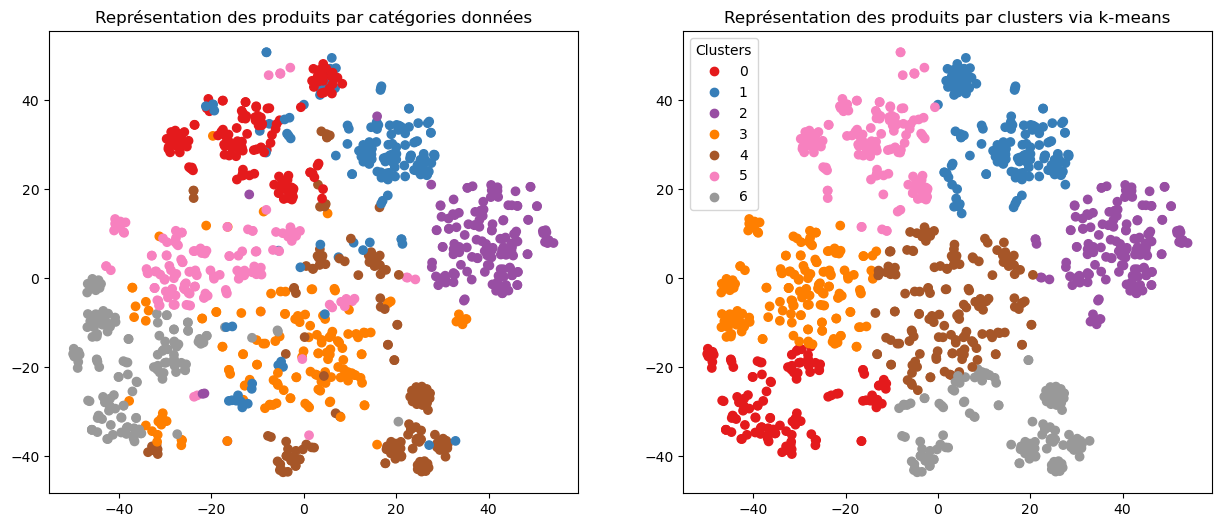

In [14]:
# result for first attempt (we had ARI = 0.4676)
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))
  
ax = fig.add_subplot(121)
scatter = ax.scatter(tsne_tf_idf[:,0],tsne_tf_idf[:,1], c=given_categs, cmap='Set1')
#ax.legend(handles=scatter.legend_elements()[0], labels=first_cat_name, loc="best", title="Catégories")
plt.title('Représentation des produits par catégories données')
   
ax = fig.add_subplot(122)
scatter = ax.scatter(tsne_tf_idf[:,0],tsne_tf_idf[:,1], c=cls.labels_, cmap='Set1')
ax.legend(handles=scatter.legend_elements()[0], labels=set(cls.labels_), loc="best", title="Clusters")
plt.title('Représentation des produits par clusters via k-means')
   
plt.show()

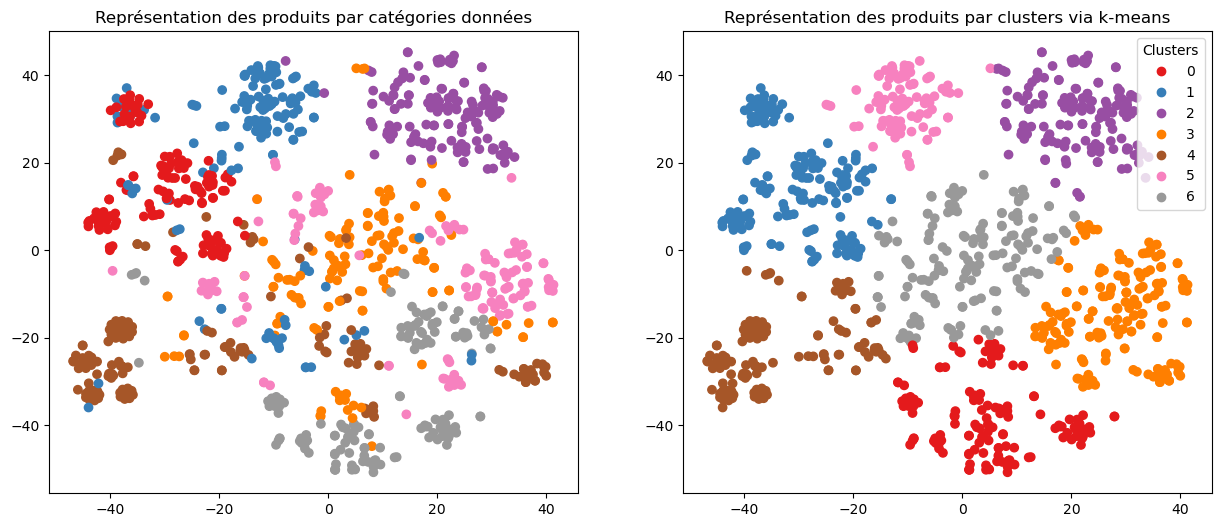

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))
  
ax = fig.add_subplot(121)
scatter = ax.scatter(tsne_tf_idf[:,0],tsne_tf_idf[:,1], c=given_categs, cmap='Set1')
#ax.legend(handles=scatter.legend_elements()[0], labels=first_cat_name, loc="best", title="Catégories")
plt.title('Représentation des produits par catégories données')
   
ax = fig.add_subplot(122)
scatter = ax.scatter(tsne_tf_idf[:,0],tsne_tf_idf[:,1], c=cls.labels_, cmap='Set1')
ax.legend(handles=scatter.legend_elements()[0], labels=set(cls.labels_), loc="best", title="Clusters")
plt.title('Représentation des produits par clusters via k-means')
   
plt.show()

Certains clusters sont très proches des catégories données mais ont un numéro différent, si on corrige cela on devrait avoir un ARI bien meilleur. Pour ce faire, nous allons créer une liste 'labels' pour remplacer les cls.labels_ par les numéros correspondants le mieux aux catégories données, sans changer les clusters constitués :

In [15]:
# change for first attempt (ARI = 0.4676)
labels = []
for i in cls.labels_:
    if i == 0:
        labels.append(6)
    elif i == 1:
        labels.append(1)
    elif i == 2:
        labels.append(2)
    elif i == 3:
        labels.append(5)
    elif i == 4:
        labels.append(3)
    elif i == 5:
        labels.append(0)
    else:
        labels.append(4)

labels[0:15]

[0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [16]:
ARI = np.round(metrics.adjusted_rand_score(given_categs, labels), 4)
ARI

0.4676

Je me suis trompé, le calcul de l'ARI prend en compte les éventuelles différences d'affectations des numéros de classes. Donc il faut trouver une façon plus profonde d'améliorer l'ARI. On peut toutefois visualiser les classes avec les numéros harmonisés :

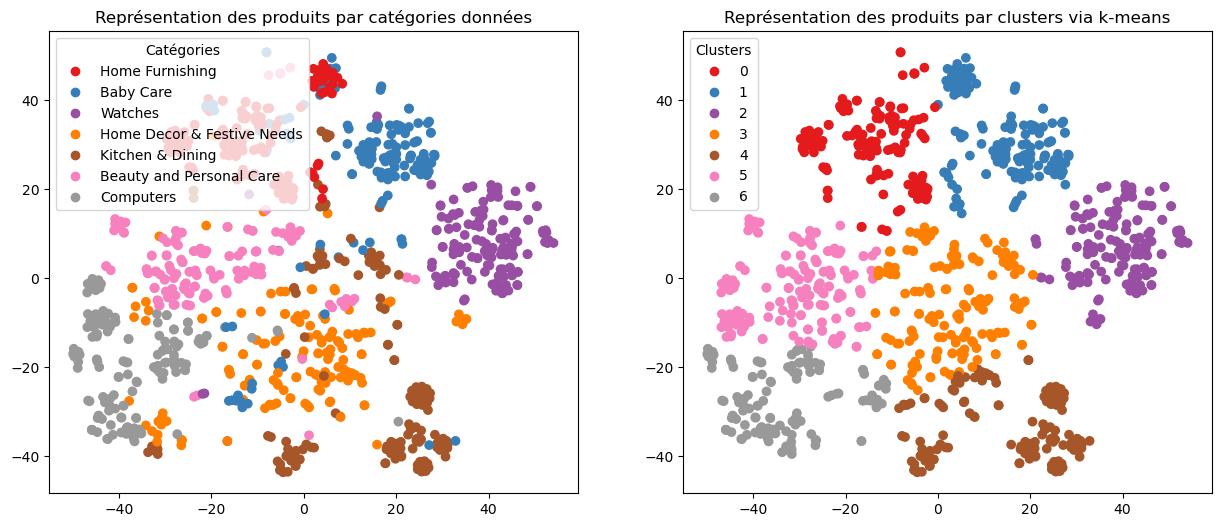

In [17]:
# result for first attempt (ARI = 0.4676)
fig = plt.figure(figsize=(15,6))
  
ax = fig.add_subplot(121)
scatter = ax.scatter(tsne_tf_idf[:,0],tsne_tf_idf[:,1], c=given_categs, cmap='Set1')
ax.legend(handles=scatter.legend_elements()[0], labels=first_cat_name, loc="best", title="Catégories")
plt.title('Représentation des produits par catégories données')
   
ax = fig.add_subplot(122)
scatter = ax.scatter(tsne_tf_idf[:,0],tsne_tf_idf[:,1], c=labels, cmap='Set1')
ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
plt.title('Représentation des produits par clusters via k-means')
   
plt.show()

Essayons de changer un peu les hyperparamètres du t-SNE pour voir si cela permet d'obtenir un meilleur score ARI par rapport aux catégories données :

In [28]:
tsne = manifold.TSNE(n_components=2, perplexity=20, n_iter=2500, 
                     init='random', learning_rate=250, random_state=4)
tsne_tf_idf = tsne.fit_transform(tf_idf)

cls = cluster.KMeans(n_clusters=7, n_init=50, random_state=4)
cls.fit(tsne_tf_idf)

ARI = np.round(metrics.adjusted_rand_score(given_categs, cls.labels_), 4)
ARI

0.6041

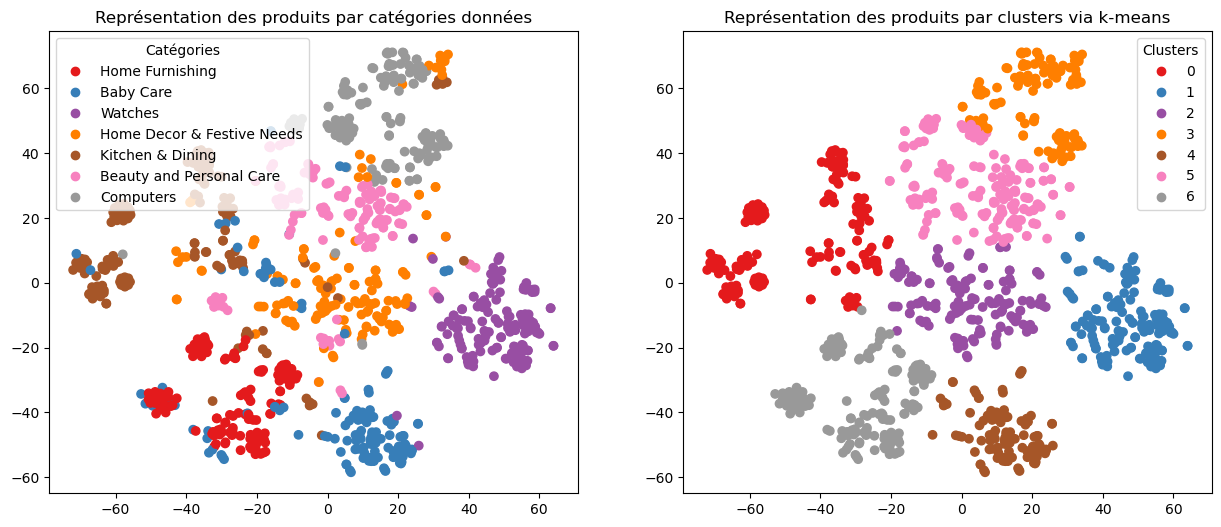

In [29]:
# significantly better ! Let's visualize ... :
#first_cat_name = ['Home Furnishing', 'Baby Care', 'Watches',
#                  'Home Decor & Festive Needs', 'Kitchen & Dining',
#                  'Beauty and Personal Care', 'Computers']

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(121)
scatter = ax.scatter(tsne_tf_idf[:,0],tsne_tf_idf[:,1], c=given_categs, cmap='Set1')
ax.legend(handles=scatter.legend_elements()[0], labels=first_cat_name, loc="best", title="Catégories")
plt.title('Représentation des produits par catégories données')
   
ax = fig.add_subplot(122)
scatter = ax.scatter(tsne_tf_idf[:,0],tsne_tf_idf[:,1], c=cls.labels_, cmap='Set1')
ax.legend(handles=scatter.legend_elements()[0], labels=set(cls.labels_), loc="best", title="Clusters")
plt.title('Représentation des produits par clusters via k-means')
   
plt.show()

Nous avons encore beaucoup de points différemment classés entre ces deux représentations; Il y a peut être quelques erreurs dans les catégories données, mais là ça parait beaucoup.
<br>Nous allons donc essayer d'améliorer l'arrangement de nos mots de descriptions avec des techniques plus avancées qui tendent à rapprocher des termes de même registre, comme le 'word2vec' ou d'autres stratégies de 'word embedding'.
<br>Et cela à partir de notre dictionnaire déjà nettoyé et normalisé, tant qu'à faire.

In [1]:
import pickle
with open('prodesc.pickle', 'rb') as f:
    prodesc = pickle.load(f)
f.close()

len(prodesc['bbb8cdc5406ff60ff06ff64630f2ca47'])

36

In [2]:
len(list(prodesc.values())[10])

87

In [3]:
max_desc_len = 1
for desc in prodesc.values():
    if len(list(desc)) > max_desc_len :
        max_desc_len = len(list(desc))

max_desc_len

303

In [4]:
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import backend as K
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

import gensim

tf.keras.backend.set_floatx('float64')
# pip install threadpoolctl==3.2.0 <- 2.2.0 initially installed but causes a bug later

In [5]:
# supprimer du livrable
print(tf.__version__)
print(tensorflow.__version__)

2.12.0
2.12.0


In [6]:
w2v_size=100     # the number of dimensions (N) of the N-dimensional space that
                 # gensim Word2Vec maps the words onto.
w2v_window=4     # Maximum distance between the current and predicted word within
                 # a sentence, default 5.
w2v_min_count=1  # To ignore the tokens which appear less than 'min_count' value.
w2v_epochs=20    # Number of iterations (epochs) over the corpus, default 5.

# Doc. for all gensim word2vec parameters :
# https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec

# Creation and training of the Word2Vec model
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                   vector_size=w2v_size, seed=3, workers=1)
#                                  workers = multiprocessing.cpu_count(), default 3
#                            seed = Seed for the random number generator, default 1

corpus = [" ".join(s) for s in prodesc.values()]
corpus = [gensim.utils.simple_preprocess(text) for text in corpus]

w2v_model.build_vocab(corpus)
w2v_model.train(corpus, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))

Vocabulary size: 4263


In [7]:
w2v_model.corpus_count

1050

In [8]:
# re-tokenize our 'corpus' with the 'tensorflow.keras.preprocessing.text' Tokenizer :
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
x_corpus = pad_sequences(tokenizer.texts_to_sequences(corpus),
                         maxlen=max_desc_len,
                         padding='post')
# cf.:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

num_words = len(tokenizer.word_index) + 1
# Above : because tokenizer.texts_to_sequences ignores the less frequent word !

print("Number of unique words: %i" % num_words)

Number of unique words: 4264


In [9]:
# Creation of the embedding matrix :
import numpy as np

embedding_matrix = np.zeros((num_words, w2v_size))
i=0
j=0
    
for word, idx in tokenizer.word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)

print("Word embedding rate : ", word_rate)
print("Embedding matrix dimensions: %s" % str(embedding_matrix.shape))

Word embedding rate :  1.0
Embedding matrix dimensions: (4264, 100)


In [10]:
# Model creation : (with tensorflow 2.12.0 OK, 2.16.1 KO : other args ...)

word_input=Input(shape=(max_desc_len,),dtype='float64')

word_embedding = Embedding(input_dim = num_words,
                           output_dim = w2v_size,
                           weights = [embedding_matrix],
                           input_length=max_desc_len)(word_input)


word_vec = GlobalAveragePooling1D()(word_embedding)

In [11]:
embed_model = Model([word_input], word_vec)
embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 303)]             0         
                                                                 
 embedding (Embedding)       (None, 303, 100)          426400    
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 426,400
Trainable params: 426,400
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Model execution :
embeddings = embed_model.predict(x_corpus)
embeddings.shape

33/33 [==============================] - 0s 2ms/step


(1050, 100)

In [13]:
from sklearn import cluster, manifold, metrics

tsne = manifold.TSNE(n_components=2, perplexity=20, n_iter=2500, 
                     init='random', learning_rate=250, random_state=3)
tsne_embeds = tsne.fit_transform(embeddings)

cls = cluster.KMeans(n_clusters=7, n_init=50, random_state=3)
cls.fit(tsne_embeds)


# - - in case of restart after prodcat creation : - -
with open('prodcat.pickle', 'rb') as f:
    prodcat = pickle.load(f)
f.close()

given_categs = [i - 1 for i in prodcat.values()]
# - - - - - - - - - - - - - - - - - - - - - - - - - -

ARI = np.round(metrics.adjusted_rand_score(given_categs, cls.labels_), 4)
ARI

C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


0.3115

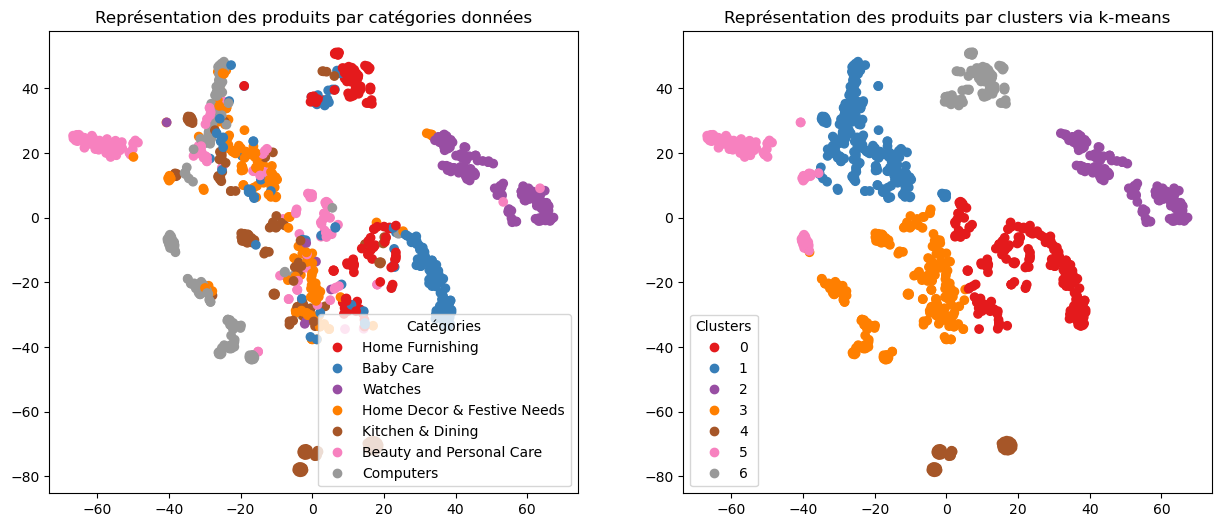

In [14]:
import matplotlib.pyplot as plt

# - - in case of restart after prodcat creation : - -
first_cat_name = ['Home Furnishing', 'Baby Care', 'Watches',
                  'Home Decor & Festive Needs', 'Kitchen & Dining',
                  'Beauty and Personal Care', 'Computers']
# - - - - - - - - - - - - - - - - - - - - - - - - - -

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(121)
scatter = ax.scatter(tsne_embeds[:,0],tsne_embeds[:,1], c=given_categs, cmap='Set1')
ax.legend(handles=scatter.legend_elements()[0], labels=first_cat_name, loc="best", title="Catégories")
plt.title('Représentation des produits par catégories données')
   
ax = fig.add_subplot(122)
scatter = ax.scatter(tsne_embeds[:,0],tsne_embeds[:,1], c=cls.labels_, cmap='Set1')
ax.legend(handles=scatter.legend_elements()[0], labels=set(cls.labels_), loc="best", title="Clusters")
plt.title('Représentation des produits par clusters via k-means')
   
plt.show()

Le 'Word2vec embedding' est donc ici bien moins performant que l'utilisation d'un "simple TF-IDF".
<br>Nous allons donc essayer une méthode d'embedding plus moderne (plus lourde aussi) qui a fait ses preuves avec beaucoup de succès sur de très nombreux problèmes de NLP : BERT (Bidirectional Encoder Representations from Transformers).

In [16]:
# supprimer du livrable
import threadpoolctl
print(threadpoolctl.__version__)

2.2.0


In [14]:
# supprimer du livrable
type(embedding_matrix)

numpy.ndarray

In [15]:
# supprimer du livrable
embedding_matrix[8, 8]

-0.14492496848106384

In [16]:
# supprimer du livrable
type(embedding_matrix[8, 8])

numpy.float64

In [17]:
# supprimer du livrable
type(word_embedding)

keras.engine.keras_tensor.KerasTensor

In [14]:
# supprimer du livrable
word_embedding[8, 8]

<KerasTensor: shape=(100,) dtype=float64 (created by layer 'tf.__operators__.getitem')>

In [19]:
# supprimer du livrable
type(word_vec)

keras.engine.keras_tensor.KerasTensor

In [15]:
# supprimer du livrable
word_vec[8, 8]

<KerasTensor: shape=() dtype=float64 (created by layer 'tf.__operators__.getitem_1')>

In [21]:
# supprimer du livrable
word_vec.shape

TensorShape([None, 100])

In [16]:
# supprimer du livrable
word_vec[8]

<KerasTensor: shape=(100,) dtype=float64 (created by layer 'tf.__operators__.getitem_2')>

In [15]:
# supprimer du livrable
import threadpoolctl
threadpoolctl.__version__

'3.2.0'

In [1]:
import pickle
with open('prodesc.pickle', 'rb') as f:
    prodesc = pickle.load(f)
f.close()

In [2]:
import numpy as np

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

C:\Users\jlper\anaconda3\Lib\site-packages\transformers\deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
C:\Users\jlper\anaconda3\Lib\site-packages\transformers\generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v4.40. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [3]:
max_length = 64
batch_size = 10
batch_size_pred = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
corpus = [" ".join(s) for s in prodesc.values()]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

C:\Users\jlper\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jlper\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
loading configuration file config.json from cache at C:\Users\jlper\.cache\huggingface\hub\models--bert-base-uncased\snapsh

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at C:\Users\jlper\.cache\huggingface\hub\models--bert-base-uncased\snapshots\86b5e0934494bd15c9632b12f734a8a67f723594\model.safetensors
Loaded 109,482,240 parameters in the TF 2.0 model.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a Be

In [7]:
bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
last_hidden_states_tot = tf.data.Dataset

for step in range(len(corpus)//batch_size) :
    idx = step*batch_size
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for desc in corpus[idx:idx+batch_size]:
        bert_inp = bert_tokenizer.encode_plus(desc,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)

    outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
    last_hidden_states = outputs.last_hidden_state

    if step==0 :
        last_hidden_states_tot = last_hidden_states
        last_hidden_states_tot_0 = last_hidden_states
    else :
        last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))

features_bert = np.array(last_hidden_states_tot).mean(axis=1)


1/1 [==============================] - 1s 586ms/step


In [8]:
# Above output : the 105 lines corresponding to the 1050 items / batch_size = 10
features_bert

array([[ 0.10439694,  0.00686257,  0.654894  , ..., -0.02278147,
        -0.07733661,  0.02649471],
       [ 0.32484066, -0.0050137 ,  0.51921356, ..., -0.1657919 ,
        -0.03477526,  0.1079597 ],
       [-0.02364366, -0.09432184,  0.53779244, ..., -0.13157462,
        -0.31046066, -0.02733264],
       ...,
       [ 0.09458446, -0.07768531,  0.18986209, ...,  0.09902897,
        -0.05419707, -0.04153967],
       [ 0.21969034, -0.1656371 ,  0.3556772 , ...,  0.24824217,
        -0.15874423, -0.22089873],
       [ 0.13085157, -0.36281058,  0.58729875, ...,  0.09591162,
        -0.11508501, -0.21081354]], dtype=float32)

In [9]:
from sklearn import cluster, manifold, metrics

tsne = manifold.TSNE(n_components=2, perplexity=20, n_iter=2500, 
                     init='random', learning_rate=250, random_state=3)
tsne_bert = tsne.fit_transform(features_bert)

cls = cluster.KMeans(n_clusters=7, n_init=50, random_state=3)
cls.fit(tsne_bert)


# - - in case of restart after prodcat creation : - -
with open('prodcat.pickle', 'rb') as f:
    prodcat = pickle.load(f)
f.close()

given_categs = [i - 1 for i in prodcat.values()]
# - - - - - - - - - - - - - - - - - - - - - - - - - -

ARI = np.round(metrics.adjusted_rand_score(given_categs, cls.labels_), 4)
ARI

C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


0.2887

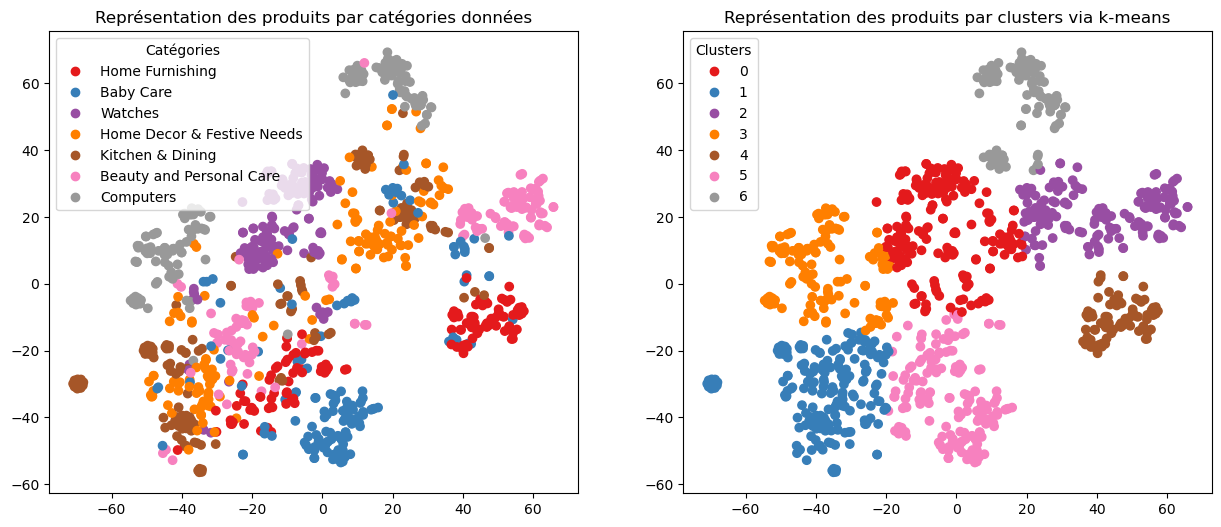

In [10]:
import matplotlib.pyplot as plt

# - - in case of restart after prodcat creation : - -
first_cat_name = ['Home Furnishing', 'Baby Care', 'Watches',
                  'Home Decor & Festive Needs', 'Kitchen & Dining',
                  'Beauty and Personal Care', 'Computers']
# - - - - - - - - - - - - - - - - - - - - - - - - - -

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(121)
scatter = ax.scatter(tsne_bert[:,0],tsne_bert[:,1], c=given_categs, cmap='Set1')
ax.legend(handles=scatter.legend_elements()[0], labels=first_cat_name, loc="best", title="Catégories")
plt.title('Représentation des produits par catégories données')
   
ax = fig.add_subplot(122)
scatter = ax.scatter(tsne_bert[:,0],tsne_bert[:,1], c=cls.labels_, cmap='Set1')
ax.legend(handles=scatter.legend_elements()[0], labels=set(cls.labels_), loc="best", title="Clusters")
plt.title('Représentation des produits par clusters via k-means')
   
plt.show()

BERT n'a donc pas donné de résultat intéressant (dans sa version 'bert-base-uncased' en tout cas, mais il semble un peu difficile de trouver une version bien adaptée au traitement des descriptifs de produits variés); Nous allons alors essayer une autre technique nommée 'USE' pour 'Universal Sentence Encoder':

In [1]:
# in case of restart here :
import pickle
with open('prodesc.pickle', 'rb') as f:
    prodesc = pickle.load(f)
f.close()

with open('prodcat.pickle', 'rb') as f:
    prodcat = pickle.load(f)
f.close()

given_categs = [i - 1 for i in prodcat.values()]

first_cat_name = ['Home Furnishing', 'Baby Care', 'Watches',
                  'Home Decor & Festive Needs', 'Kitchen & Dining',
                  'Beauty and Personal Care', 'Computers']

In [3]:
# pip install tensorflow_hub
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf

embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2")

batch_size = 10
corpus = [" ".join(s) for s in prodesc.values()]
features = tf.data.Dataset

for step in range(len(corpus)//batch_size) :
    idx = step*batch_size
    feat = embed(corpus[idx:idx+batch_size])

    if step ==0 :
        features = feat
    else :
        features = np.concatenate((features,feat))

features

array([[-0.05122907, -0.05025655, -0.01264615, ...,  0.03054991,
         0.05077342,  0.01381521],
       [-0.03105867, -0.01141289, -0.04935747, ...,  0.0165008 ,
         0.05330234,  0.03562926],
       [-0.05573634, -0.00256334, -0.0363061 , ...,  0.0442074 ,
        -0.01625815, -0.0336749 ],
       ...,
       [ 0.05109064,  0.01048854,  0.04684598, ..., -0.05796885,
         0.06299144, -0.06496847],
       [ 0.04049867,  0.0019872 ,  0.05225626, ..., -0.02003814,
        -0.01015589, -0.03526257],
       [-0.00575843,  0.04092366,  0.06325563, ...,  0.00366751,
        -0.00594277, -0.01671182]], dtype=float32)

In [4]:
from sklearn import cluster, manifold, metrics

tsne = manifold.TSNE(n_components=2, perplexity=20, n_iter=2500, 
                     init='random', learning_rate=250, random_state=3)
tsne_use = tsne.fit_transform(features)

cls = cluster.KMeans(n_clusters=7, n_init=50, random_state=3)
cls.fit(tsne_use)

ARI = np.round(metrics.adjusted_rand_score(given_categs, cls.labels_), 4)
ARI

C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


0.4916

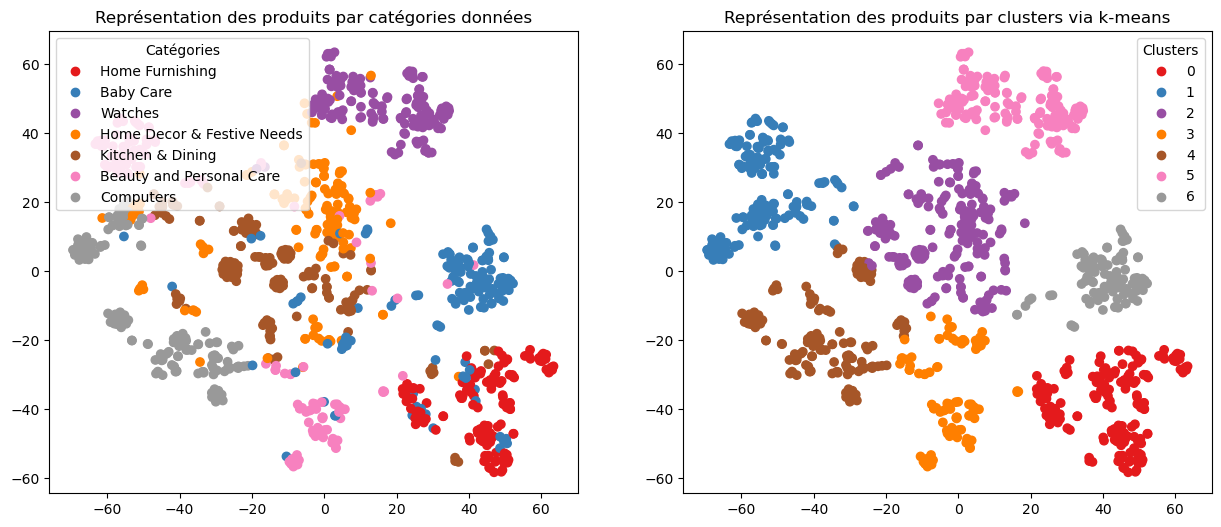

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(121)
scatter = ax.scatter(tsne_use[:,0],tsne_use[:,1], c=given_categs, cmap='Set1')
ax.legend(handles=scatter.legend_elements()[0], labels=first_cat_name, loc="best", title="Catégories")
plt.title('Représentation des produits par catégories données')
   
ax = fig.add_subplot(122)
scatter = ax.scatter(tsne_use[:,0],tsne_use[:,1], c=cls.labels_, cmap='Set1')
ax.legend(handles=scatter.legend_elements()[0], labels=set(cls.labels_), loc="best", title="Clusters")
plt.title('Représentation des produits par clusters via k-means')
   
plt.show()

Bien qu'étant plus performant que BERT, USE ne permet pas de classer suffisamment correctement les produits sur la base de leurs descriptions. La meilleure performance que nous ayons eu en utilisant le NLP est de 0.6, en tachant d'optimiser les paramètres du tsne; Mais heureusement nous avons aussi les images des produits, nous allons donc les exploiter pour améliorer la classification.